# **Artificial Neural Network**

This model works on **email detection(Categorizing emails as spam or not spam)**.

# **Importing the libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# **Importing the dataset**


### **read the data as CVS format using pandas.**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/MyCode_DeepLearning/email_dataset.csv")
print(data.shape)
print(data.head())

(5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [4]:
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None


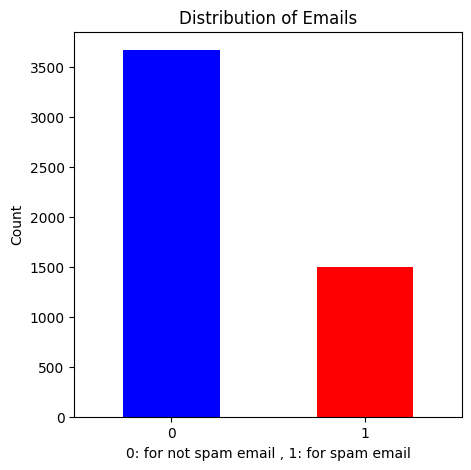

In [6]:
label_counts = data['Prediction'].value_counts()
plt.figure(figsize=(5, 5))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Emails')
plt.xlabel("0: for not spam email , 1: for spam email")
plt.ylabel('Count')
plt.xticks(ticks=range(len(label_counts.index)), labels=label_counts.index, rotation=0)
plt.show()

### **Split the data into features and labels.**

In [7]:
X = data.iloc[:,3:-1].values
Y =data.iloc[:,-1].values

In [8]:
print(X)

[[ 1  0  0 ...  0  0  0]
 [24  6  6 ...  0  1  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 1  1  0 ...  0  0  0]
 [ 1  0  2 ...  0  1  0]
 [ 5  1  6 ...  0  0  0]]


In [9]:
print(Y)

[0 0 0 ... 1 1 0]


### **Data preprocessing**

In [10]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [11]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 32)

In [13]:
SC = MinMaxScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

# **Building the ANN**


In [14]:
ANN = tf.keras.models.Sequential()
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dropout(0.2))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dropout(0.2))
ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### **Compiling the Model.**

In [15]:
ANN.compile(optimizer =tf.keras.optimizers.Adam(),
            loss= 'binary_crossentropy',
            metrics=['accuracy'])

### **Build Callbacks.**

In [16]:
Filepath = "/content/drive/MyDrive/MyCode_DeepLearning/ANN_model.weights.h5"
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=Filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

Early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)

### **Training the model.**

In [17]:
Epochs = 15
Batch_size = 32

In [18]:
History = ANN.fit(x_train,
                  y_train,
                  validation_data=(x_test, y_test),
                  batch_size= Batch_size,
                  epochs= Epochs,
                  callbacks=[ModelCheckpoint, Early_stopping, Reduce_lr])

Epoch 1/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.7970 - loss: 0.4156 - val_accuracy: 0.9720 - val_loss: 0.0715 - learning_rate: 0.0010
Epoch 2/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9851 - loss: 0.0536 - val_accuracy: 0.9778 - val_loss: 0.0683 - learning_rate: 0.0010
Epoch 3/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.9778 - val_loss: 0.0840 - learning_rate: 0.0010
Epoch 4/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9816 - val_loss: 0.0913 - learning_rate: 2.0000e-04
Epoch 5/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9807 - val_loss: 0.0964 - learning_rate: 1.0000e-04


### **plot_loss_curves.**

In [19]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

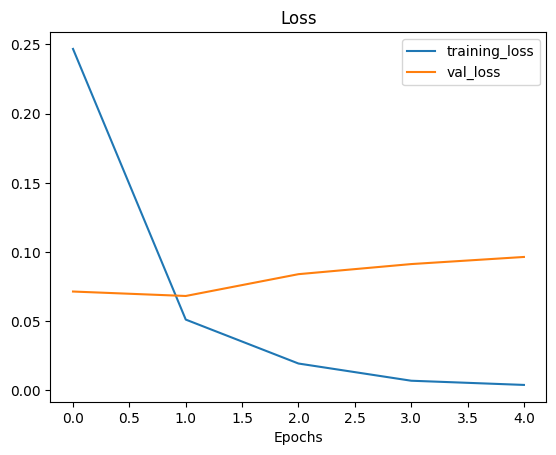

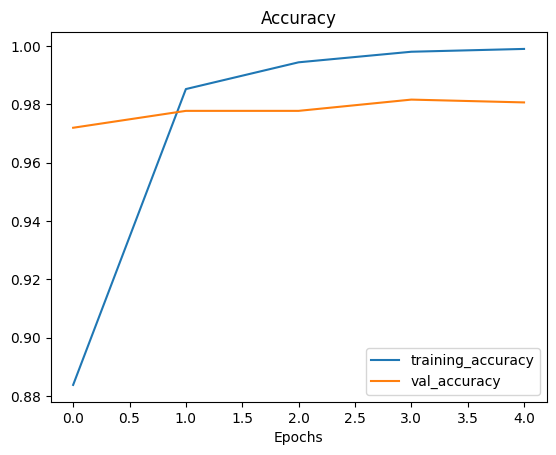

In [20]:
plot_loss_curves(History)

### **Perform prediction and evaluation of our model.**

In [21]:
prediction = ANN.predict(x_test)
Loss, Accuracy = ANN.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0695


In [22]:
print(f"Model loss on test set: {(Loss):.2f}%")
print(f"Model accuracy on test set: {(Accuracy*100):.0f}%")

Model loss on test set: 0.07%
Model accuracy on test set: 98%


### **Model Summary.**

In [23]:
ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │         305,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,036,805 (3.96 MB)

 Trainable params: 345,601 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 691,204 (2.64 MB)

### **Save your model in HDF5 format.**

In [97]:
#Filepath = "/content/drive/MyDrive/MyCode_DeepLearning/ANN.h5"
#Save_ANN_model = ANN.save(Filepath)

### **loading your model using the filepath.**

### **Make confusion matrix.**

In [24]:
def make_confusion_matrix(y_true, y_preds,figsize=(10, 10), text_size=15):
# Create the confusion matrix to binary classification
    cm = confusion_matrix(y_test, tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

# Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

# Create classes
    classes = False

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

# Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes),
            yticks=np.arange(n_classes),
            xticklabels=labels,
            yticklabels=labels)

# Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

# Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

# Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                  horizontalalignment="center",
                  color="white" if cm[i, j] > threshold else "black",
                  size=text_size)

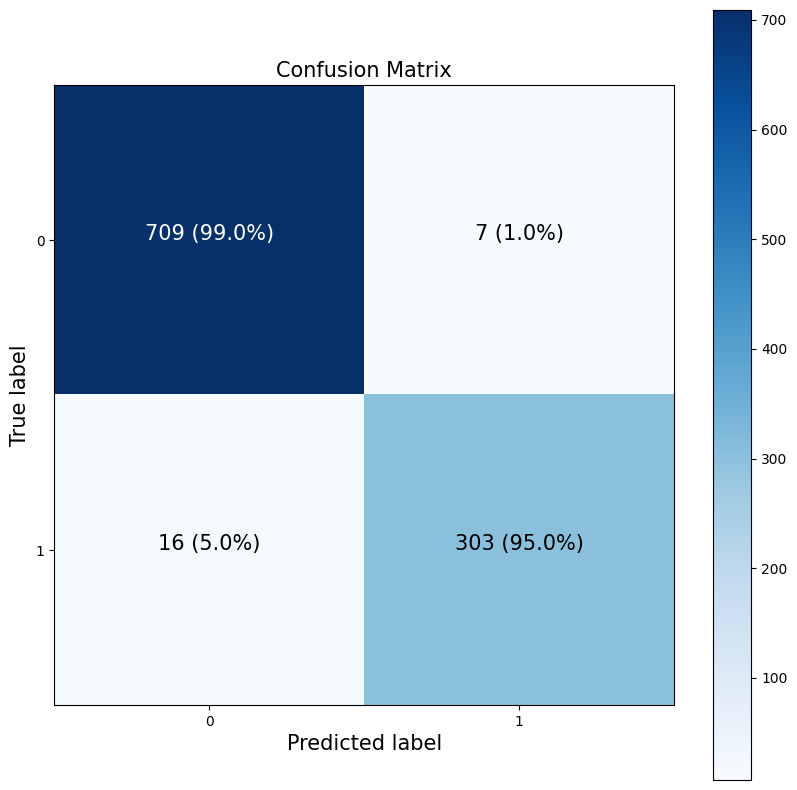

In [25]:
make_confusion_matrix(y_test, tf.round(prediction),figsize=(10, 10), text_size=15)

### **Evaluate the prediction model using the classification report.**

In [45]:
print(classification_report(y_test, tf.round(prediction)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       716
           1       0.98      0.95      0.96       319

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [83]:
Prediction_dataset = pd.DataFrame({'true_values': y_test,
                                    'Prediction_values': prediction.flatten().round()})
Prediction_dataset.head(10)

,true_values,Prediction_values
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0
5,1,1.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


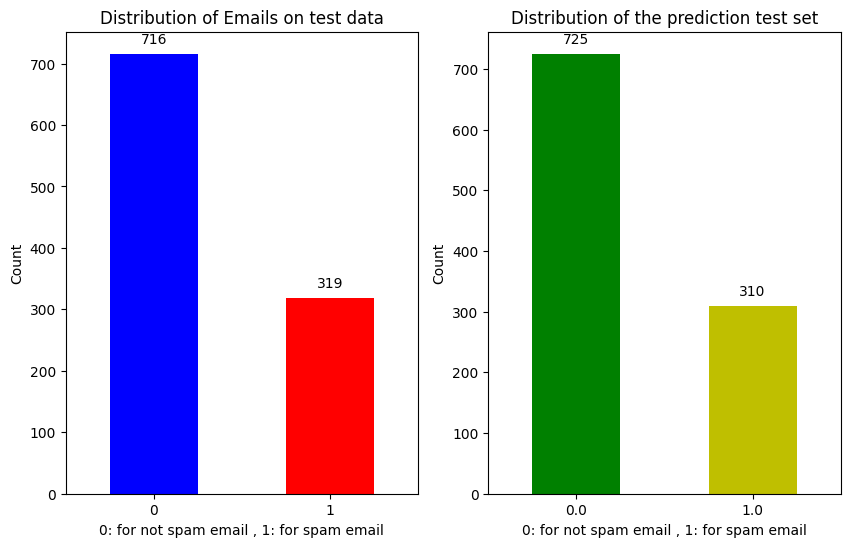

In [95]:
true_values = Prediction_dataset['true_values'].value_counts()
Prediction_values = Prediction_dataset['Prediction_values'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
bars1 = true_values.plot(kind='bar', color=['b', 'r'])
plt.title('Distribution of Emails on test data')
plt.xlabel("0: for not spam email , 1: for spam email")
plt.ylabel('Count')
plt.xticks(ticks=range(len(true_values.index)), labels=true_values.index, rotation=0)
for p in bars1.patches:
    bars1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.subplot(1, 2, 2)
plt.title('Distribution of the prediction test set')
bars2 = Prediction_values.plot(kind='bar', color=['g', 'y'])
plt.xlabel("0: for not spam email , 1: for spam email")
plt.ylabel('Count')
plt.xticks(ticks=range(len(Prediction_values.index)), labels=Prediction_values.index, rotation=0)
for p in bars2.patches:
    bars2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# **Fine-tuning.**

### **Number of layers, number of neurons in each layer and Dropout rate.**

In [26]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [27]:
#import tensorflow as tf
#import keras_tuner as kt
#from tensorflow.keras.layers import Dense, Dropout

#def build_model(hp):
#    model = tf.keras.models.Sequential()

    # Define the number of layers as a hyperparameter
#   num_layers = hp.Int('num_layers', min_value=2, max_value=6, step=1)

    # Add the first layer separately since it's usually a different case
#    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
#                    activation=hp.Choice('activation_function', values=['relu', 'tanh', 'sigmoid'])))

    # Add hidden layers dynamically based on the num_layers hyperparameter
#   for i in range(num_layers - 1):  # Subtract 1 since the first layer is added separately
#        model.add(Dense(units=hp.Int(f'units_{i + 2}', min_value=32, max_value=256, step=32),
#                        activation=hp.Choice('activation_function', values=['relu', 'tanh', 'sigmoid'])))
#        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
#   model.add(Dense(units=1, activation='sigmoid'))

    # Learning rate as a hyperparameter

    # Compile the model
#    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5,
#                                                                            max_value=1e-1, sampling='LOG')),
#                  loss='binary_crossentropy',
#                  metrics=['accuracy'])
#    return model

# Instantiate the tuner
#tuner = kt.Hyperband(
#    build_model,
#    objective='val_loss',
#    max_epochs=10,
#    factor=3,
#    directory='my_dir',
#    project_name='Fine_tuning'
#)

# Run the tuner search
#tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Retrieve the best model and hyperparameters
#best_model = tuner.get_best_models(num_models=1)[0]
#best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
#print(f"Best Number of Layers: {best_hyperparameters.get('num_layers')}")
#for i in range(best_hyperparameters.get('num_layers')):
#    print(f"Best Number of Neurons in Layer {i + 1}: {best_hyperparameters.get(f'units_{i + 1}')}")
#   if i < best_hyperparameters.get('num_layers') - 1:
#        print(f"Best Dropout Rate after Layer {i + 1}: {best_hyperparameters.get(f'dropout_{i}')}")
#print(f"Best Activation Function: {best_hyperparameters.get('activation_function')}")
#print(f"Best Learning Rate: {best_hyperparameters.get('learning_rate')}")

Trial 30 Complete [00h 00m 14s]
val_loss: 0.0762253999710083

Best val_loss So Far: 0.05935141444206238
Total elapsed time: 00h 07m 41s
Best Number of Layers: 3
Best Number of Neurons in Layer 1: 160
Best Dropout Rate after Layer 1: 0.4
Best Number of Neurons in Layer 2: 96
Best Dropout Rate after Layer 2: 0.1
Best Number of Neurons in Layer 3: 64
Best Activation Function: relu
Best Learning Rate: 0.003419752763044568


**Run this cell to remove the fine tuning.**

In [28]:
import shutil
# Clear the previous tuning directory
#shutil.rmtree('/content/my_dir/Fine_tuning', ignore_errors=True)

# Rebuild the model after fine-tuning the number of layers, the number of neurons in each layer, and the dropout rate.

### **Build the ANN.**

In [37]:
ANN = tf.keras.models.Sequential()
ANN.add(tf.keras.layers.Dense(units = 160, activation = 'relu'))
ANN.add(tf.keras.layers.Dropout(0.4))
ANN.add(tf.keras.layers.Dense(units = 96, activation = 'relu'))
ANN.add(tf.keras.layers.Dropout( 0.1))
ANN.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### **Compiling the model.**

In [38]:
ANN.compile(optimizer =tf.keras.optimizers.Adam(learning_rate= 0.0034),
            loss= 'binary_crossentropy',
            metrics=['accuracy'])

### **Training the model.**

In [39]:
fineTuning_History = ANN.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        batch_size= Batch_size,
        epochs= Epochs+5,
        callbacks = [Early_stopping, ModelCheckpoint])

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.8462 - loss: 0.3203 - val_accuracy: 0.9671 - val_loss: 0.0832
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0464 - val_accuracy: 0.9749 - val_loss: 0.0754
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0227 - val_accuracy: 0.9691 - val_loss: 0.1128


The model stops training before completing all epochs because it has reached the best results.

### **plot loss curves.**

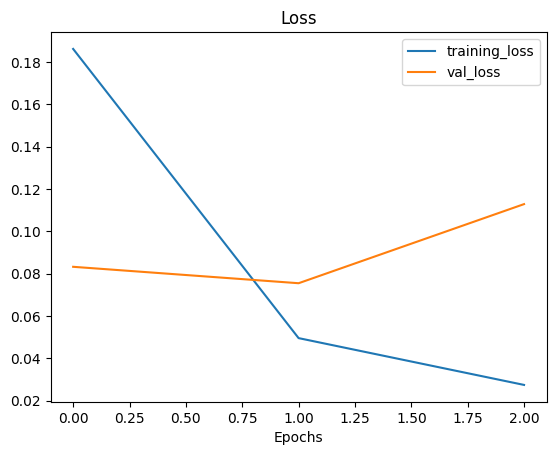

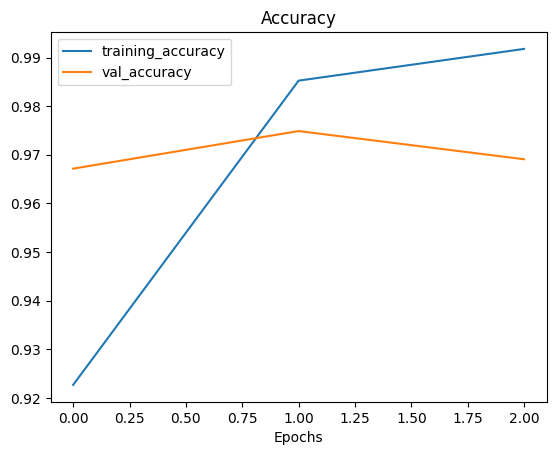

In [40]:
plot_loss_curves(fineTuning_History)

### **Perform prediction and evaluation of our model.**

In [41]:
FineTuning_Prediction = ANN.predict(x_test)
FineTuning_Loss, FineTuning_Accuracy = ANN.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.0747


In [42]:
print(f"Model loss on test set: {(FineTuning_Loss):.2f}%")
print(f"Model accuracy on test set: {(FineTuning_Accuracy*100):.0f}%")

Model loss on test set: 0.08%
Model accuracy on test set: 97%


### **Model summary.**

In [43]:
ANN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 160)                 │         488,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 96)                  │          15,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,529,669 (5.84 MB)

 Trainable params: 509,889 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,780 (3.89 MB)

### **Make confusion matrix.**

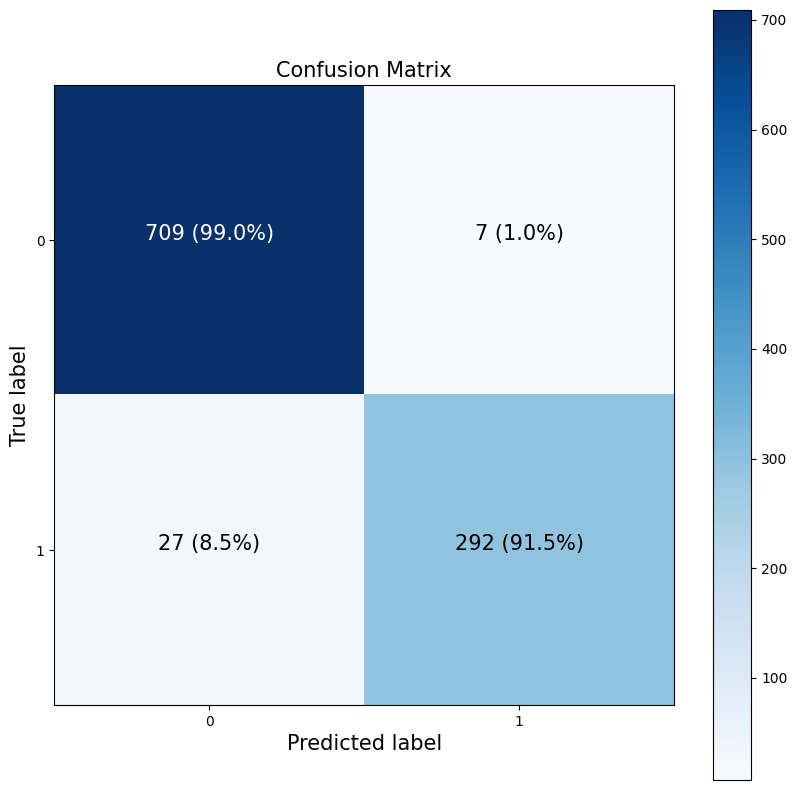

In [104]:
make_confusion_matrix(y_test, tf.round(FineTuning_Prediction),figsize=(10, 10), text_size=15)

### **Evaluate the prediction model using the classification report.**

In [47]:
print(classification_report(y_test, tf.round(FineTuning_Prediction)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       716
           1       0.98      0.92      0.94       319

    accuracy                           0.97      1035
   macro avg       0.97      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035



**Create a data set containing the correct values ​​from the test set and the predicted values ​​from your model, and then plot this data set to show the number of incorrect predictions.**

In [88]:
FineTuning_Prediction_dataset = pd.DataFrame({'true_values': y_test,
                                               'Prediction_values': FineTuning_Prediction.flatten().round()})

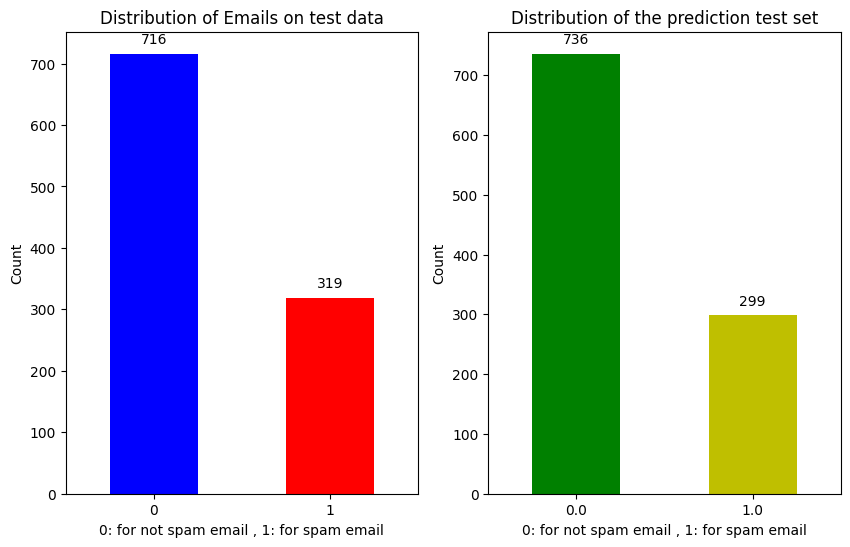

In [94]:
true_values = FineTuning_Prediction_dataset['true_values'].value_counts()
Prediction_values = FineTuning_Prediction_dataset['Prediction_values'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
bars1 = true_values.plot(kind='bar', color=['b', 'r'])
plt.title('Distribution of Emails on test data')
plt.xlabel("0: for not spam email , 1: for spam email")
plt.ylabel('Count')
plt.xticks(ticks=range(len(true_values.index)), labels=true_values.index, rotation=0)
for p in bars1.patches:
    bars1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.subplot(1, 2, 2)
plt.title('Distribution of the prediction test set')
bars2 = Prediction_values.plot(kind='bar', color=['g', 'y'])
plt.xlabel("0: for not spam email , 1: for spam email")
plt.ylabel('Count')
plt.xticks(ticks=range(len(Prediction_values.index)), labels=Prediction_values.index, rotation=0)
for p in bars2.patches:
    bars2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### **Save your model after fine tuning in HDF5 format.**

In [98]:
Filepath = "/content/drive/MyDrive/MyCode_DeepLearning/ANN_finetuning.h5"
Save_ANN_model = ANN.save(Filepath)

### **loading your model using the filepath.**

In [99]:
load_model = tf.keras.models.load_model(Filepath)

In [100]:
load_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 160)                 │         488,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 96)                  │          15,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 509,891 (1.95 MB)

 Trainable params: 509,889 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [101]:
load_model.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9701 - loss: 0.0747


[0.08321158587932587, 0.9671497344970703]